# Некоторые виды задач кластеризации для изображений

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans


warnings.filterwarnings('ignore')

%matplotlib inline

## Рассморим датасет рукописных цирф MNIST

In [3]:
from sklearn import datasets

# загружаем датасет
X, y = datasets.load_digits(return_X_y=True) 
print("Экземпляров: {}\nРазмер изображения: {}x{}".format(X.shape[0], np.sqrt(X.shape[1]), np.sqrt(X.shape[1])))

Экземпляров: 1797
Размер изображения: 8.0x8.0


Выведем первые 10 экземпляров данных

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


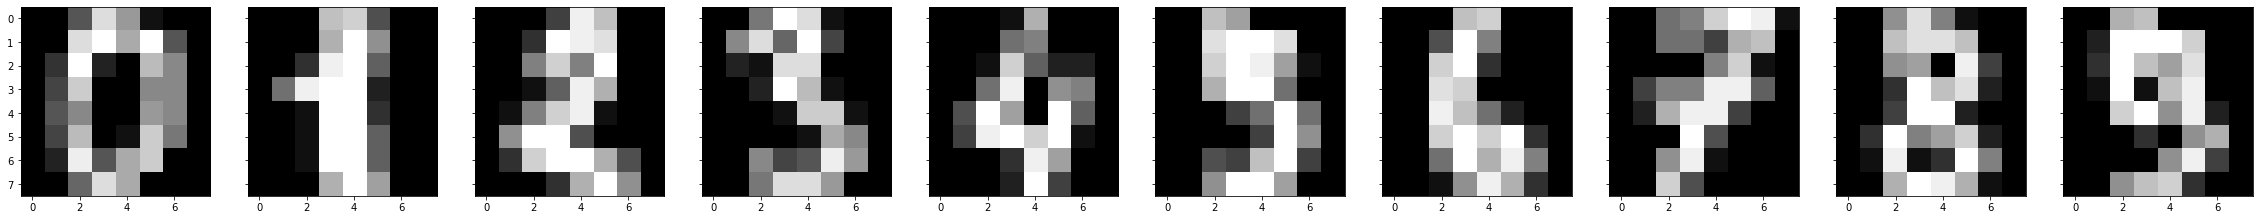

In [4]:
count = 10
testX = X[:count]
print(testX[0])
testX[0,:].reshape([8,8])
f, axes = plt.subplots(1, count, sharey=True, figsize=(40,6))
for i in range(count):
    axes[i].imshow(testX[i,:].reshape([8,8]), cmap='gray')


Натренируем KMeans на наборе X для 10 кластеров

In [5]:
from sklearn.cluster import KMeans

clusters_mnist = KMeans(n_clusters=10).fit(X)

labels_mnist = clusters_mnist.labels_

Проверим. Выведем 10 точек из какого нибудь кластера и посмотрим, что они соотвествуют одной цифре.

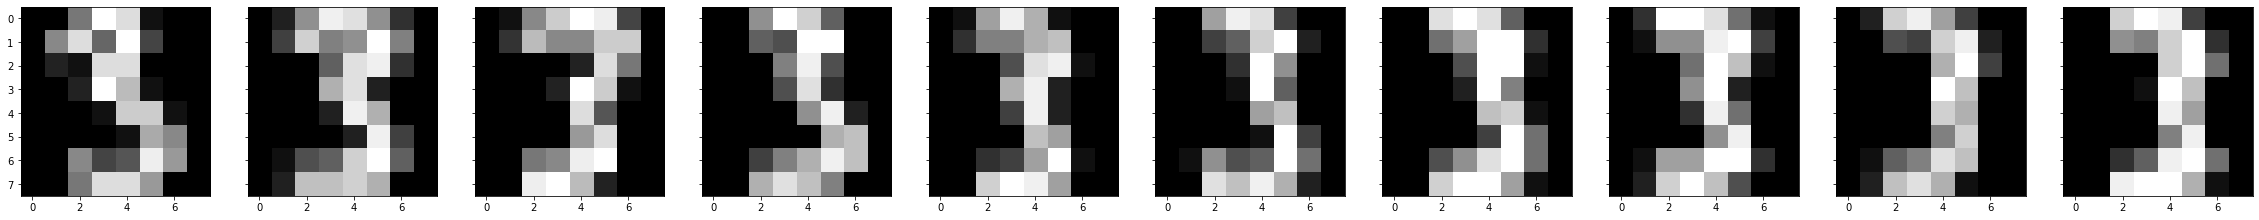

In [6]:
number = 3 # Номер кластера
count = 10 # Кол-во примеров

# все изображения, у которых метка 4
testX = X[y == number]

f, axes = plt.subplots(1, count, sharey=True, figsize=(40,6))
for i in range(count):
    axes[i].imshow(testX[i,:].reshape([8,8]), cmap='gray')

Для первых 10 объектов выведем картинку, метку от KMeans и класс у 

6 : 0;    8 : 1;    5 : 2;    4 : 3;    3 : 4;    4 : 5;    2 : 6;    1 : 7;    5 : 8;    4 : 9;    

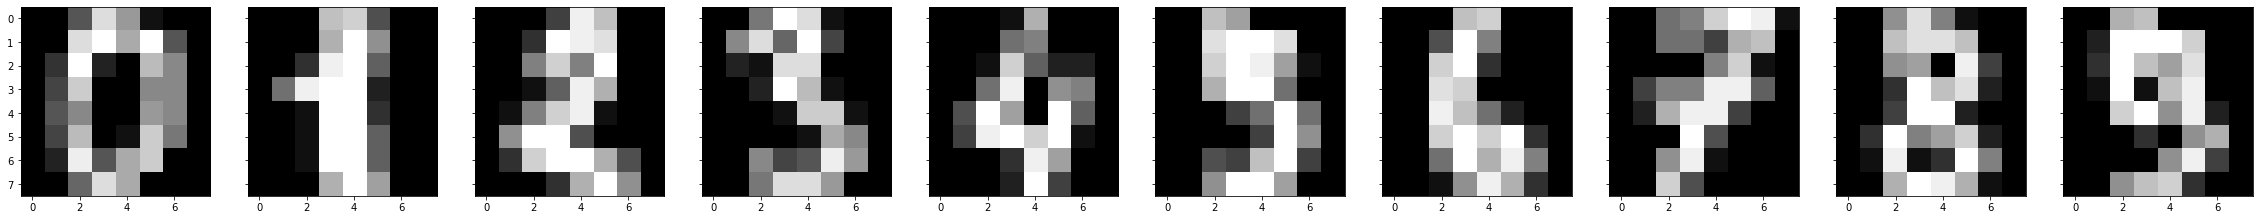

In [7]:
count = 10 # Кол-во примеров

f, axes = plt.subplots(1, count, sharey=True, figsize=(40,6))
for i in range(count):
    print(labels_mnist[i], ':', y[i], end = ';    ')
    axes[i].imshow(X[i,:].reshape([8,8]), cmap='gray')

Не всегда результат кластеризации соответсвует истине

### Задание

Проанализируйте качество кластеризации с помощью внутренних и внешних метрик из библиотеки `skilearn`.

Например, внешние (принимают значения от 0 до 1, чем ближе к 1, тем лучше):

- `adjusted_mutual_info_score` (AMI - Скорректированная взаимная информация), 

- `normalized_mutual_info_score` (NMI - Нормализованная взаимная информация), 

- `homogeneity_completeness_v_measure` (одновременно вычисляет однородность, полноту, V-меру);

внутренние:

- `silhouette_score` (более высокий показатель Коэффициента Силуэта относится к модели с более четко определенными кластерами)

- `alinski_harabaz_score`(более высокий показатель Калински-Харабаша относится к модели с более четко определенными кластерами)

- `davies_bouldin_score`(более низкий индекс Дэвиса-Булдина относится к модели с лучшим разделением между кластерами)


In [8]:
#внешние метрики
from sklearn.metrics import adjusted_mutual_info_score 
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure

print("AMI = ", adjusted_mutual_info_score(y, labels_mnist)) #первый параметр - истинные классы, 2 - предсказанные
print("NMI = ", normalized_mutual_info_score(y, labels_mnist))
print("homogeneity_completeness_v_measure = ", homogeneity_completeness_v_measure(y, labels_mnist))
# 1 элемент - однородность, 2 - полнота, 3 - V-мера

AMI =  0.7486467057708334
NMI =  0.7511764097617759
homogeneity_completeness_v_measure =  (0.7404366417051205, 0.7622323162646166, 0.7511764097617759)


In [9]:
#внутренние метрики
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

print("silhouette_score = ", silhouette_score(X, labels_mnist))
print("calinski_harabasz_score = ", calinski_harabasz_score(X, labels_mnist))
print("davies_bouldin_score = ", davies_bouldin_score(X, labels_mnist))

silhouette_score =  0.1882752696343184
calinski_harabasz_score =  168.5495892003551
davies_bouldin_score =  1.8336171624036646


## Центры кластеров фотографий

Можно найти центры кластеров по фотографиям людей....

In [1]:
# загрузим датасет с фотографиями знаменитостей
from sklearn import datasets
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=50, resize=0.4)
lfw_people.images[0]
#min_faces_per_person=50 - только фотографии людей, у которых хотя бы 50 фотографий.

array([[ 24.333334,  29.333334,  62.333332, ...,  48.333332,  52.666668,
         68.666664],
       [ 28.666666,  49.333332,  95.333336, ...,  60.      ,  51.      ,
         67.333336],
       [ 39.      ,  74.666664, 121.333336, ...,  89.      ,  62.      ,
         68.      ],
       ...,
       [ 45.      ,  46.      ,  48.      , ..., 198.66667 , 101.666664,
         44.333332],
       [ 56.      ,  55.333332,  55.666668, ..., 134.      ,  50.      ,
         35.666668],
       [ 39.333332,  36.666668,  34.      , ...,  65.      ,  30.666666,
         37.333332]], dtype=float32)

In [4]:
lfw_people.data

array([[ 24.333334 ,  29.333334 ,  62.333332 , ...,  65.       ,
         30.666666 ,  37.333332 ],
       [ 79.333336 ,  64.333336 ,  66.333336 , ...,  91.666664 ,
         94.       ,  93.333336 ],
       [ 17.       ,  30.333334 ,  66.       , ...,  42.       ,
         57.       ,  77.       ],
       ...,
       [ 39.       ,  33.666668 ,  46.333332 , ...,   5.3333335,
         14.333333 ,  17.666666 ],
       [ 34.       ,  32.333332 ,  28.333334 , ..., 165.       ,
        178.66667  , 200.66667  ],
       [ 54.       ,  56.666668 ,  32.666668 , ..., 183.       ,
        154.33333  ,  53.333332 ]], dtype=float32)

Посмотрим на содержимое набора данных

Gerhard Schroeder: 109 photos.


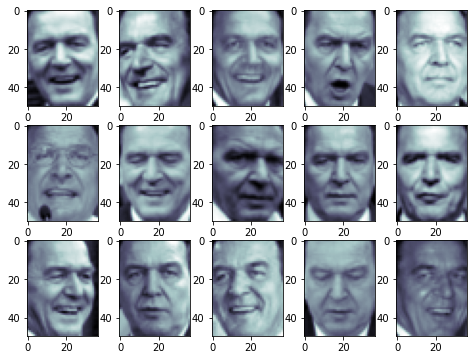

In [11]:
fig = plt.figure(figsize=(8, 6))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1)
    ax.imshow(lfw_people.images[i], cmap='bone')

for i, name in enumerate(lfw_people.target_names):
    print("{}: {} photos.".format(name, (lfw_people.target == i).sum()))

In [12]:
lfw_people.images[0].shape

(50, 37)

### Задание

Натренируйте kMeans и нарисуйте центры кластеров как картинки выше.

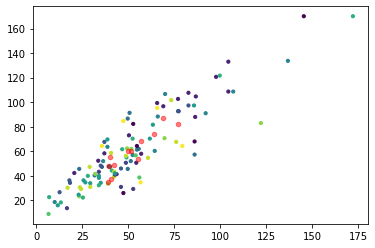

In [13]:
#натренируем kmeans на 12 кластеров
clusters_mnist_people = KMeans(n_clusters=12).fit(lfw_people.data)
labels_mnist_people = clusters_mnist_people.labels_

#центры кластеров
plt.scatter(lfw_people.data[:,0], lfw_people.data[:,1], c=labels_mnist_people, s=10, cmap='viridis')
centers = clusters_mnist_people.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=20, alpha=0.5)

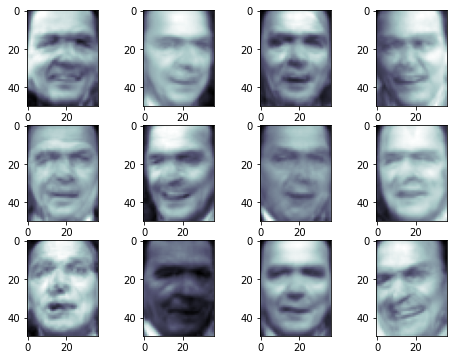

In [21]:
fig = plt.figure(figsize=(8, 6))

for i in range(12):
    ax = fig.add_subplot(3, 4, i + 1)
    ax.imshow(centers[i].reshape(50, 37), cmap='bone')

## Птичка

С помощью алгоритмов кластеризации можно уменьшить число цветов в изображении. В данном случае будут кластеризоваться похожие пиксели. Такой подход позволяет перейти к суперпиксельному представлению изображений, которое является более компактным и используется в задачах компьютерного зрения.

Загрузим картинку bird.jpg с помощью scikit-image и выведем ее с помощью matplotlib.

In [ ]:
%matplotlib inline
from skimage.io import imread
from matplotlib import pyplot as plt
import numpy as np

img = imread("bird.jpg")
plt.figure(figsize=(10,15))
plt.axis('off')
plt.imshow(img)

In [ ]:
img

Если вы посмотрите на содержимое numpy-массива `img`, в котором хранится изображение, то увидите, что там будут числа от 0 до 255. Нам лучше перейти к числам от 0 до 1.

Преобразуем нашу матрицу.

In [ ]:
from skimage import img_as_float
img_float = img_as_float(img)
plt.imshow(img_float)

In [ ]:
img_float

Мы получили матрицу размера (300, 400, 3). Нам это не подходит. Чтобы запустить kMeans нам нужно иметь много-много объектов и 3 признака - значение яркости пикселя в каналах Red, Green и Blue.

Преобразуем матрицу так, чтобы получилась матрица размера (120000, 3).


In [ ]:
points = np.reshape(img_float, (120000, 3))
points

Хотим преобразовать картинку так, чтобы оба состояла из точек 8 цветов. Для этого обучим KMeans для 8 кластеров.

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8).fit(points)

In [ ]:
centers = kmeans.cluster_centers_

У нас есть значения цвета для каждого центра кластера. Каждый пиксель в результате обучения KMeans теперь имеет свою метку кластера. Значит мы можем заменить все пиксели на соответсвующие им центры класетров.

### Задание###
Проведите это преобразование и выведите 8-цветное изображение.



In [ ]:
#kmeans.predict([points[0]])
#centers
for i in range (len(points)):
    points[i] = centers[kmeans.predict([points[i]])]

In [ ]:
new_points = np.reshape(points, (300, 400, 3))
plt.imshow(new_points)